### AI 가 사람의 능력을 증가시키는 도구로 사용 : 확장된 지능.

# 8.1 LSTM

순환 신경망의 시퀀스 데이터 생성

###1. 순환 신경망

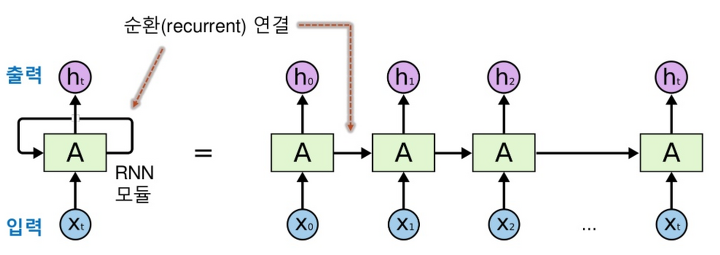

유닛들 간의 연결이 순환적 구조를 가진다는 특성이 있다.   
순환 신경망은 음악 생성, 대화 생성, 이미지 생성, 음성 합성, 분자 설계 등에 성공적으로 사용됨.

###2. 시퀀스 데이터

* 파이썬에서 가장 일반적인 데이터 구조이다.   
* 데이터들을 순서대로 하나씩 나열하여 나타낸 데이터 구조

딥 러닝에서 시퀀스를 생성하는 일반적인 방법 : 이전 토큰을 입력으로 사용해서   
시퀀스의 다음 1개 또는 몇 개의 토큰을 RNN이나 컨브넷으로 예측.

텍스트 데이터 : 토큰은 보통 단어 혹은 글자   
이전 토큰들이 주어졌을 때 다음 토큰의 확률을 모델링할 수 있는 네트워크 : 언어 모델(language model)

language model : 언어의 통계적 구조인 잠재 공간을 탐색.

모델을 훈련하고 난 후 : 이 모델에서 샘플링을 할 수 있음 (새로운 시퀀스를 생성한다.)   
1. 초기 텍스트 문자열 주입(조건 데이터(conditioning data)라고 부른다.)
2. 새로운 글자나 단어(토큰)을 생성한다. -> 한 번에 여러 개의 토큰을 생성할 수도 있다.
3. 생성된 출력이 다시 입력 데이터로 추가됨.
4. 이 과정을 여러 번 반복
> 이러한 반복을 통해 모델이 훈련한 데이터 구조가 반영된 임의의 길이를 가진 시퀀스 데이터를 생성할 수 있음!

LSTM : 글자 수준의 신경망 언어 모델(character-lavel neural language model)이라고도 부름.

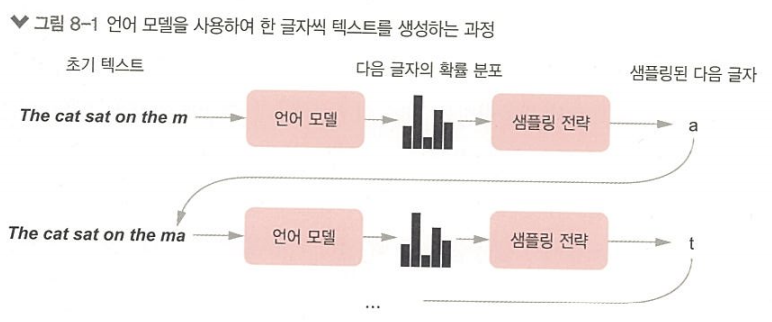

###3. 탐욕적 샘플링, 확률적 샘플링

* 탐욕적 샘플링(greedy sampling) : 항상 가장 높은 확률릏 가진 글자를 선택   
* 확률적 샘플링(stochastic sampling) : 다음 글자의 확률 분포에서 샘플링하는 과정에 무작위성을 주입하는 방법.   
###확률적이다(stochastic) = 무작위적이다(random)

모델의 소프트맥스 훈련 : 확률적 샘플링에 활용하기 좋음.   
이따금 샘플링됨 것 같지 않은 글자를 샘플링 -> 훈련 데이터에는 없지만 실제로 있을 것 같은 데이터 생성

이 훈련의 문제점: random함의 정도를 조절할 방법이 없음.   
두 극단의 중간 지점.

### 4. 소프트맥스 온도(softmax temperature)

확률 분포에 사용되는 확률 분포의 엔트로피

In [ ]:
import numpy as np

def reweight_distribution(original_distribution, temperature = 0.5):
  distribution = np.log(original_distribution) / temperature
  distribution = np.exp(distribution)

  return distribution / np.sum(distribution)

* 높은 온도 : 더 창의적인 결과물
* 낮은 온도 : 예상할 수 있는 데이터

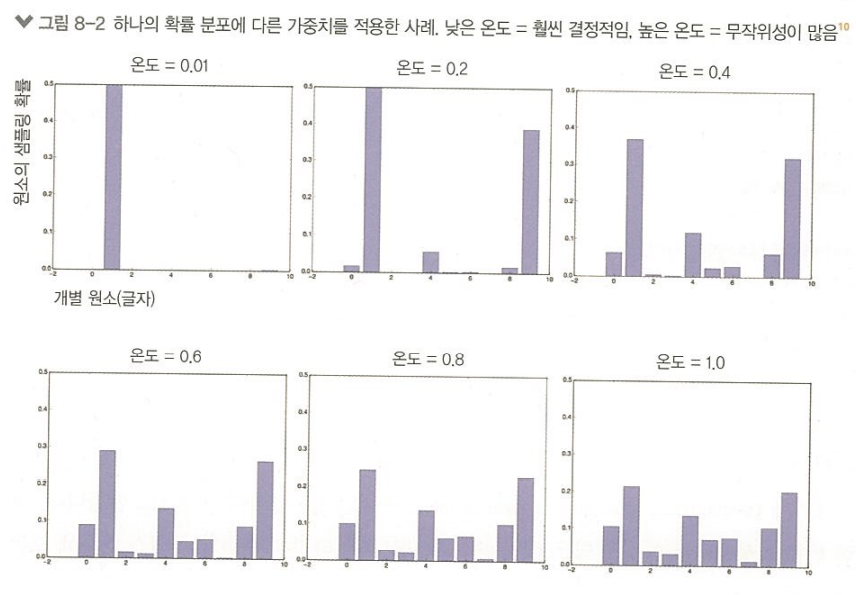

### 4. 글자 수준의 LSTM 텍스트 생성 모델 구현

In [ ]:
import keras
import numpy as np

path = """"""
text = open(path).read().lower()
print('말뭉치 크기', len(text))

maxlen = 60
step = 3

sentences= []
next_chars = []

for i in range(, len(text)-maxlen, step):
  sentences.append(text[i:i+maxlen])
  next_chars.append(text[i+maxlen])

print('시퀀스 개수 :', len(sentences))

chars = sorted(list(set(text)))
print('고유한 글자 :', len(chars))

char_indices = dict((char, chars.index(char)) for char in chars)

print('벡터화')
x = np.zeros(len(sentences), maxlen, len(chars), dtype = np.bool)
y = np.zeros(len(sentences), len(chars), dtype = np.bool)

for i, sentences in enumerate(sentences):
  for t, char in enumerate(sentence):
    x[i, t, char_indices[char] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [ ]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape = (maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation = 'softmax'))

optimizer = keras.optimizers.RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer)

# 8.3 뉴럴 스타일 트랜스퍼

타깃 이미지의 콘텐츠를 보존하면서 참조 이미지의 스타일을 타깃 이미지에 적용한다.

스타일 : 질감, 색깔, 이미지에 있는 다양한 크기의 시각 요소    
콘텐츠 : 이미지에 있는 고수준의 대형 구조

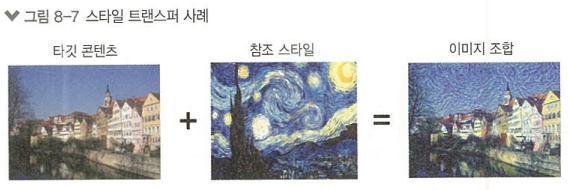

In [ ]:
loss = distance(style(reference_image) - style(generated_image))
+ distance(content(original_image) - content(generated_image))

NameError: ignored

* distance = norm 함수   
* content = 이미지의 콘텐츠 표현 계산   
* style = 이미지의 스타일 표현 계산

## 1. 콘텐츠 손실

네트워크의 하위 층 : 이미지에 관한 국부적인 정보   
네트워크의 상위 층 : 전역적이고 추상적인 정보

컨브넷 층의 활성화 = 이미지를 다른 크기의 콘텐츠로 분해한다고 볼 수 있음.

타깃 이미지와 생성된 이미지를 사전 훈련된 컨브넷에 주입하여 상위 층의 활성화를 계산 (하나의 상위 층 사용)   
→ 두 값 사이의 L2 norm이 콘텐츠 손실로 사용하기 좋음.

## 2. 스타일 손실

콘텐츠 손실이 하나의 상위 층만 사용하는 반면, 스타일 손살은 ConvNet의 여러 개의 층을 사용한다.   
하나의 스타일이 아니라 참조 이미지에서 컨브넷이 추출한 모든 크기의 스타일을 잡아야 함.

활성화 출력의 그람 행렬을 스타일 손실로 사용한다.

* 그람 행렬

층의 특성 맵들의 내적 (inner product)   
실수체에서 정의하는경우 , 그람 매트릭스(그람 행렬) G 는 어떤 벡터 M 과 그들의 집합 V를 예약했을때,   
이들의 내적 곱의 모든 경우의 행렬 표현이다.

특성의 상관관계는 특정 크기의 공간적인 패턴 통계를 잡아낸다. → 이 층에서 찾은 텍스쳐와 대응 (경험에 비추어 보았을 때?)

* 스타일 참조 이미지와 생성된 이미지로 층의 활성화를 계산
* 스타일 손실 : 그 안에 내재된 상관된 상관관계를 비슷하게 보존하는 것이 목적
* 스타일 참조 이미지와 생성된 이미지에서 여러 크기의 텍스쳐가 비슷해보이게 만든다.

요약
* 콘텐츠를 보존하기 위해 타깃 콘텐츠 이미와 생성된 이미지 사이에서 상위 층의 활성화를 비슷하게 유지
* 스타일을 보존하기 위해 저수준 층과 고수준 층에서 활성화 안에 상관관계를 비슷하게 유지

## 3. 케라스에서의 뉴럴 스타일 트랜스퍼 구현

일반적인 과정
1. 스타일 참조 이미지, 타깃 이미지, 생성된 이미지를 위해 VGG19의 층 활성화를 동시에 계산하는 네트워크를 설정
2. 세 이미지에서 계산한 층 활성화를 사용하여 손실 함수를 정의 (이 손실을 최소화하여 스타일 트랜스퍼를 구현)
3. 손실 함수를 최소화할 경사 하강법 과정을 설정

In [ ]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [ ]:
!pip install tensorflow==1.15

  Using cached https://files.pythonhosted.org/packages/92/2b/e3af15221da9ff323521565fa3324b0d7c7c5b1d7a8ca66984c8d59cb0ce/tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/de/62/2ee9cd74c9fa2fa450877847ba560b260f5d0fb70ee0595203082dafcc9d/tensorflow_estimator-1.15.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1e/e9/d3d747a97f7188f48aa5eda486907f3b345cd409f0a0850468ba867db246/tensorboard-1.15.0-py3-none-any.whl
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorfl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 5.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
# 변수 초기값 정의하기

from keras.preprocessing.image import load_img, img_to_array, save_img

target_image_path = '/content/drive/MyDrive/workspace/mnist/crop_0.png' # 타겟 이미지의 경로
style_reference_image_path = '/content/drive/MyDrive/workspace/mnist/crop_264.png' # 스타일 이미지의 경로

width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height) # 높이가 전부 400이 되게 함.

In [ ]:
# VGG19에 입출력할 이미지의 로드, 전처리, 사후 처리를 위해 유틸리티 함수를 정의

import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path) : 
  img = load_img(image_path, target_size = (img_height, img_width))
  img = img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  """
  numpy.expand_dims(a, axis)[source]
  Expand the shape of an array.

  Insert a new axis that will appear at the axis position in the expanded array shape.
  """
  img = vgg19.preprocess_input(img) # ?
  return img

def deprocess_image(x) : 
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68   # Imagenet의 평균 픽셀 값 더하기. ???

  x = x[:, :, ::-1] # 이미지를 BGR에서 RGB로 변환한다.
  x = np.clip(x, 0, 255).astype('uint8') # np.clip으로 0보다 작은 값은 0으로, 255보다 큰 값은 255로.

  return x

In [ ]:
# 사전 훈련된 VGG19 네트워크를 로딩하고 3개 이미지에 적용하기

from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))
combination_image = K.placeholder((1, img_height, img_width, 3))

input_tensor = K.concatenate([target_image, style_reference_image, combination_image], axis = 0)

model = vgg19.VGG19(input_tensor = input_tensor, weights = 'imagenet', include_top = False)
print('Model has been loaded.')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model has been loaded.


In [ ]:
"""
placeholder(
    dtype,
    shape=None,
    name=None
)

#===================================================================
선언과 동시에 초기화 하는 것이 아니라 일단 선언 후 그 다음 값을 전달한다. 따라서 반드시 실행 시 데이터가 제공되어야 한다. 
여기서 값을 전달한다고 되어 있는데 이는 데이터를 상수값을 전달함과 같이 할당하는 것이 아니라 다른 텐서(Tensor)를 placeholder에 맵핑 시키는 것이라고 보면 된다.
"""

help(K.placeholder)

Help on function placeholder in module tensorflow.python.keras.backend:

placeholder(shape=None, ndim=None, dtype=None, sparse=False, name=None, ragged=False)
    Instantiates a placeholder tensor and returns it.
    
    Arguments:
        shape: Shape of the placeholder
            (integer tuple, may include `None` entries).
        ndim: Number of axes of the tensor.
            At least one of {`shape`, `ndim`} must be specified.
            If both are specified, `shape` is used.
        dtype: Placeholder type.
        sparse: Boolean, whether the placeholder should have a sparse type.
        name: Optional name string for the placeholder.
        ragged: Boolean, whether the placeholder should have a ragged type.
            In this case, values of 'None' in the 'shape' argument represent
            ragged dimensions. For more information about RaggedTensors, see this
            [guide](https://www.tensorflow.org/guide/ragged_tensors).
    
    Raises:
        ValueError: If

In [ ]:
# 콘텐츠 손실 정의

def content_loss(base, combination) :
  return K.sum(K.square(combination - base))

In [ ]:
# 스타일 손실
# 유틸리티 함수를 사용하여 입력 행렬의 그람 행렬을 계산한다. (원본 특성 행렬의 상관관계를 기록한 행렬)

def gram_matrix(x) :
  features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
  gram = K.dot(features, K.transpose(features))
  return gram

def style_loss(style, combination) :
  S = gram_matrix(style)
  C = gram_matrix(combination)

  channels = 3
  size = img_height * img_width
  return K.sum(K.square(S-C)) / (4. * (channels ** 2) * (size ** 2))

In [ ]:
# 변위 손실(variation loss) 추가 : 일종의 규제 항

def total_variation_loss(x) :
  a = K.square(x[:, :img_height-1, :img_width-1, :] - x[:, 1:, :img_width - 1, :])
  b = K.square(x[:, :img_height-1, :img_width-1, :] - x[:, :img_height - 1, 1:, :])

  return K.sum(K.pow(a + b, 1.25))

최소화할 손실 = 이 세 손실의 가중치 평균   
스타일 손실을 계산하기 위해서는 하위 층과 상위 층에 걸쳐 여러 층을 사용한다.

In [ ]:
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers]) # 층 이름과 활성화 텐서를 매핑한 딕셔너리
content_layer = 'block5_conv2'
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]

loss = loss + content_weight * content_loss(target_image_features, combination_features)

for layer_name in style_layers :
  layer_features = outputs_dict[layer_name]
  style_reference_features = layer_features[1, :, :, :]
  combination_features = layer_features[2, :, :, :]
  sl = style_loss(style_reference_features, combination_features)
  loss = loss + (style_weight / len(style_layers)) * sl

loss = loss + total_variation_weight * total_variation_loss(combination_image)

In [ ]:
# 경사 하강법 단계 설정
# 참조

grads = K.gradients(loss, combination_image)[0]
#grads = K.GradientTape(loss, combination_image)[0]

fetch_loss_and_grads = K.function([combination_image], [loss, grads])

class Evaluator(object):

  def __init__(self):
    self.loss_value = None
    self.grads_values = None

  def loss(self, x) :
    assert self.loss_value is None
    x = x.reshape((1, img_height, img_width, 3))
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    self.loss_value = loss_valueself.grad_values = grad_values
    return self.loss_value

  def grads(self, x) : 
    assert self.loss_value is not None
    grad_values = np.copy(self.grad_values)
    self.loss_value = None
    self.grad_values = None
    return grad_values

evaluator = Evaluator()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [ ]:
from scipy.optimize import fmin_l_bfgs_b
import time

result_prefix = 'style_transfer_result'
iterations = 20

x = preprocess_image(target_image_path)
x = x.flatten()

for i in range(iterations) :
  print('반복 횟수 :', i)
  start_time = time.time()
  x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x, fprime = evaluator.grads, maxfun = 20)
  print('현재 손실 값 :', min_val)
  img = x.copy().reshape((img_height, img_width, 3))
  img = deprocess_image(img)
  fname = result_prefix + '_at_iteration_%d.png' %i
  save_img(fname, img)

  print('저장 이미지 :', fname)
  end_time = time.time()
  print('%d 번째 반복 완료 : %ds' % (i, end_time - start_time))

반복 횟수 : 0


KeyboardInterrupt: ignored